# DATA PREPARATION :
##  DATA CLEANING AND PREPROCESSING

## Module mporting

In [1]:
import pandas as pd
from utils.essential import *
from utils.preparation import *
from utils.preparation_visualization import *
from utils.preparation_preprocessing import *

### Dataframe Definition

In [2]:
# Google Drive access - (Uncoment if required)
#drive.mount('/content/drive')

path_df = '../data/1-improved/clicked_ads_dataset.csv' # - (Ensure path is correct)
#Original Dataframe definition
df_improved = pd.read_csv(path_df, low_memory=False)
df= df_improved.copy()

In [3]:
def column_unique_values(df, column_name):
    unique_values = df[column_name].unique()
    return list(unique_values)

#### Data Formatting and Typing

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
df['Timestamp']

0     2016-03-27 00:53:00
1     2016-04-04 01:39:00
2     2016-03-13 20:35:00
3     2016-01-10 02:31:00
4     2016-06-03 03:36:00
              ...        
995   2016-02-11 21:49:00
996   2016-04-22 02:07:00
997   2016-02-01 17:24:00
998   2016-03-24 02:35:00
999   2016-06-03 21:43:00
Name: Timestamp, Length: 1000, dtype: datetime64[ns]

#### Basic Dataframe Overview : Sample Row

In [8]:
cat_binary, cat_other, temporal, numerical = type_columns(df,True)
categorical = join_column_lists(cat_binary, cat_other)
vt_valid_row = get_valid_row(df)
vt_cat = get_data_type_by_row(df, vt_valid_row, categorical)
vt_num = get_data_type_by_row(df, vt_valid_row, numerical)
vt_temporal = get_data_type_by_row(df, vt_valid_row, temporal)

In [9]:
table_title = ['Sample of most Complete row']
column_titles = ['Categorical','Temporal','Numerical']
print_table(table_title, column_titles, vt_cat, vt_temporal, vt_num)

| ['Sample of most Complete row']                  |                                                 |                                           |
|:-------------------------------------------------|:------------------------------------------------|:------------------------------------------|
| Categorical                                      | Temporal                                        | Numerical                                 |
|                                                  |                                                 |                                           |
| Clicked on Ad: No (object)                       | Timestamp: 2016-03-27 00:53:00 (datetime64[ns]) | Age: 35 (int64)                           |
| Category: Furniture (object)                     |                                                 | Area Income: 432837300.0 (float64)        |
| City: Jakarta Timur (object)                     |                                                 | Daily Internet 

## Feature Engineering Part 1

### Feature Extraction

In [10]:
temporal

['Timestamp']

In [11]:
# Function to extract year and month
def extract_year_and_month(df, date_column):
    year_column_name = date_column + '_Year'
    month_column_name = date_column + '_Month'

    df[year_column_name] = pd.to_numeric(df[date_column].dt.year, errors='coerce').astype(pd.Int64Dtype())
    df[month_column_name] = df[date_column].dt.month_name()

    return df, [year_column_name, month_column_name]
new_columns = []

for col in temporal:
    df, columns_created = extract_year_and_month(df, col)
    new_columns.extend(columns_created)
    print(f"Extracted Year and Month from {col}")

Extracted Year and Month from Timestamp


In [12]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Sex,Timestamp,Clicked on Ad,City,Province,Category,Timestamp_Year,Timestamp_Month
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,March
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,April
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,March
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,January
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,June


- There is no duplicated data so no treatment is necessary.
- Models robust to outliers will be used during modeling so there is no need to handle outlers.

## Data Cleansing

### Unnecessary features removal

In [13]:
drop_cols = ['Unnamed: 0', 'City','Province','Timestamp']
drop_cols

['Unnamed: 0', 'City', 'Province', 'Timestamp']

In [14]:
df_prep = df.drop(columns=drop_cols)

## Features/Label Split

In [15]:
# Define your data preprocessing steps
X = df_prep.drop('Clicked on Ad', axis=1)
y = df_prep['Clicked on Ad']


## Train/Test Data Split (Leakeage Prevention)

In [16]:
from sklearn.model_selection import train_test_split
# Split the balanced data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usage example
check_feature_consistency(X_train, X_test)

Feature sets in training and test data are consistent.


In [17]:
numerical_cols, categorical_cols = list_column_types(X_train)

Numerical Columns:
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Timestamp_Year'],
      dtype='object')

Categorical Columns:
Index(['Sex', 'Category', 'Timestamp_Month'], dtype='object')


In [18]:
## Feature Engineering Part 2

## Handling Missing Values

In [19]:
# Performing Imputation
# With Data Split
X_train_Imp, X_test_Imp = impute_data(X_train, split_data=True, X_test=X_test, drop_all=False)  # Imputing rows with missing values
check_feature_consistency(X_train_Imp, X_test_Imp)
numerical_cols, categorical_cols = list_column_types(X_train_Imp)


Feature sets in training and test data are consistent.
Numerical Columns:
Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Timestamp_Year'],
      dtype='object')

Categorical Columns:
Index(['Sex', 'Category', 'Timestamp_Month'], dtype='object')


In [33]:
missing_values = X_train_Imp.isnull().sum()
total_values = X_train_Imp.size
total_missing = missing_values.sum()
percentage_missing_of_total = (total_missing / total_values) * 100
print("Number of missing values in X_train:", total_missing)
print(f"Percentage of missing values relative to total values: {percentage_missing_of_total}%")

Number of missing values in X_train: 0
Percentage of missing values relative to total values: 0.0%


In [35]:
missing_values = X_test_Imp.isnull().sum()
total_values = X_test_Imp.size
total_missing = missing_values.sum()
percentage_missing_of_total = (total_missing / total_values) * 100
print("Number of missing values in X_test:", total_missing)
print(f"Percentage of missing values relative to total values: {percentage_missing_of_total}%")

Number of missing values in X_test: 0
Percentage of missing values relative to total values: 0.0%


## Feature Engineering

### Feature Encoding & Scaling

In [20]:
# Concatenate the training and testing data for one-hot encoding
X_concatenated = pd.concat([X_train_Imp, X_test_Imp])

# Identify categorical features
categorical_features = X_concatenated.select_dtypes(include=['object']).columns
numerical_features = X_concatenated.select_dtypes(exclude=['object']).columns

# Apply one-hot encoding to the concatenated data
categorical_encoded = one_hot_encode(X_concatenated)
numerical_scaled = scale_features(X_concatenated, scaler_type='Robust')

# Concatenate the numerical columns with the one-hot encoded categorical columns
X_encoded_scaled = pd.concat([categorical_encoded, numerical_scaled], axis=1)

# Split the encoded data back into training and testing datasets
X_train_ready = X_encoded_scaled.iloc[:len(X_train_Imp)]
X_test_ready = X_encoded_scaled.iloc[len(X_train_Imp):]

In [21]:
check_feature_consistency(X_train_ready, X_train_ready)
numerical_cols, categorical_cols = list_column_types(X_train_ready)

Feature sets in training and test data are consistent.
Numerical Columns:
Index(['Sex_Perempuan', 'Category_Electronic', 'Category_Fashion',
       'Category_Finance', 'Category_Food', 'Category_Furniture',
       'Category_Health', 'Category_House', 'Category_Otomotif',
       'Category_Travel', 'Timestamp_Month_February',
       'Timestamp_Month_January', 'Timestamp_Month_July',
       'Timestamp_Month_June', 'Timestamp_Month_March', 'Timestamp_Month_May',
       'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Timestamp_Year'],
      dtype='object')

Categorical Columns:
Index([], dtype='object')


## Handling Class Imbalance

In [22]:
class_text = ["0, no default","1, yes default"]

In [25]:
    unique_classes = range(len(y.unique()))

    if class_text and len(class_text) != len(unique_classes):
        raise ValueError("Number of class names should match the number of unique classes in 'y'. Please add more names.")
    print(f"Handling class balance in {y.name}")
    total = len(y)
    proportions = [(unique_class, (y.value_counts()[unique_class] / total) * 100) for unique_class in unique_classes]

    for unique_class, proportion in proportions:
        text_class = class_text[unique_class] if class_text else f'Class {unique_class}'
        print(f'Proportion of {text_class}: {proportion:.2f}%')
    print(y_train.value_counts())

Handling class balance in Clicked on Ad
Proportion of 0, no default: 50.00%
Proportion of 1, yes default: 50.00%
Clicked on Ad
Yes    400
No     400
Name: count, dtype: int64


The target is already balanced

## Feature Selection

In [26]:
df_heatmap = X_train_ready

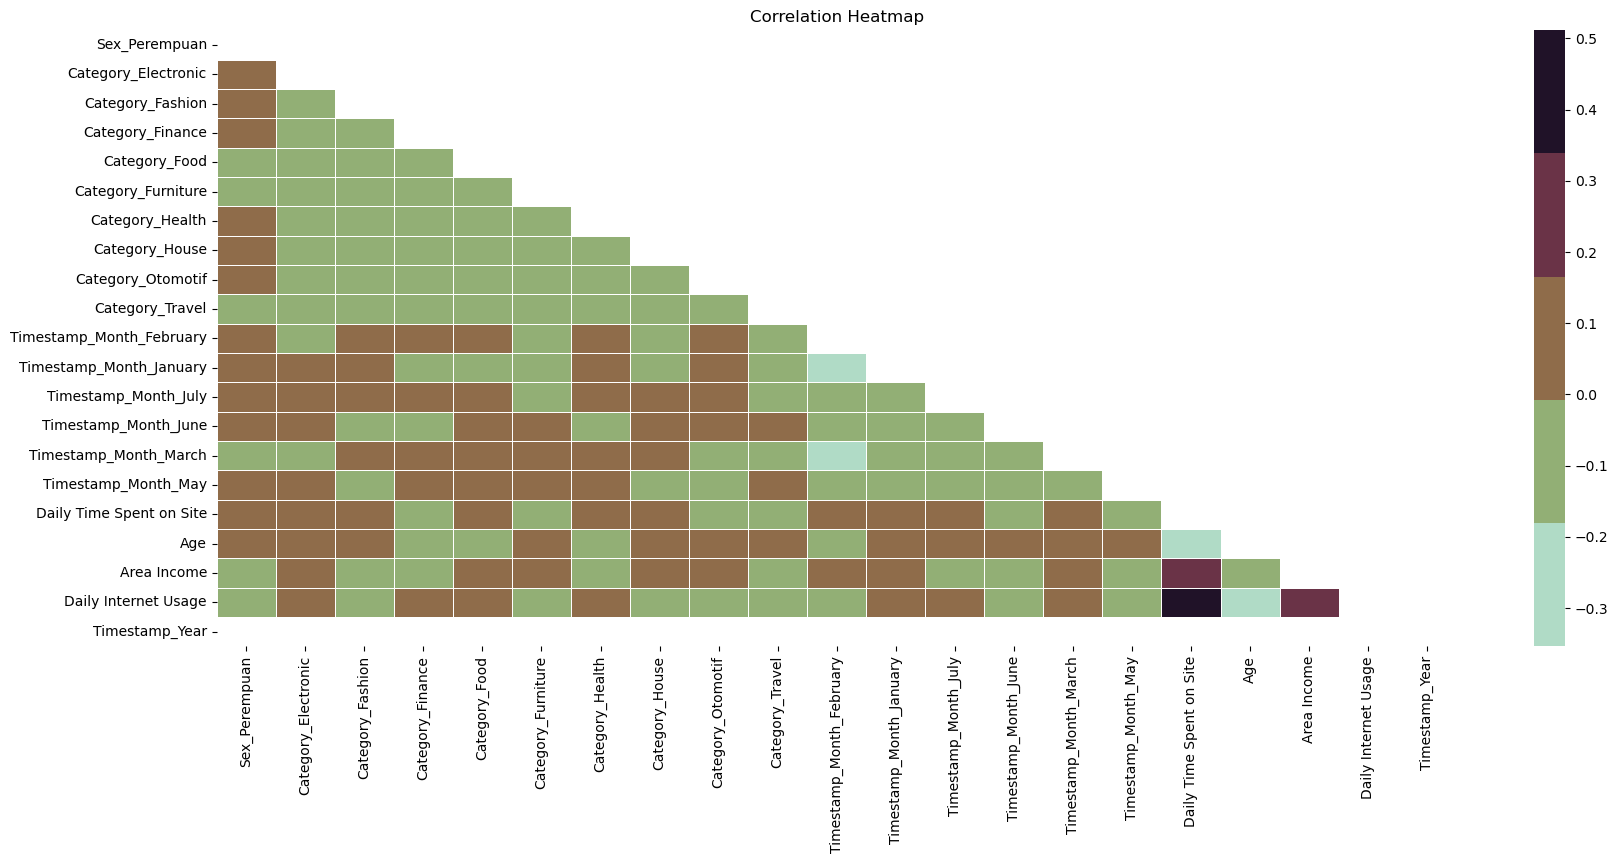

Pairs of features with high correlation between them:
---------------------------------------------------------------------------
Features to remove due to high correlation:
[]


In [39]:
plt.figure(figsize=(20, 8))
ax = plt.gca()
corr_matrix = custom_heatmap(df_heatmap, ax)
plt.show()

print("Pairs of features with high correlation between them:")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.8:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}")
features_to_drop = set()
for pair in high_corr_pairs:
    features_to_drop.update(pair)
high_corr_features = list(features_to_drop)
print("-"*75)
print("Features to remove due to high correlation:")
print(high_corr_features)

# Modeling

In [42]:
X_train_normalized = X_train_ready
X_test_normalized = X_test_ready


Random Forest Training Set:
[[400   0]
 [  0 400]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       400
         Yes       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Random Forest Testing Set:
[[97  3]
 [ 2 98]]
              precision    recall  f1-score   support

          No       0.98      0.97      0.97       100
         Yes       0.97      0.98      0.98       100

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



LightGBM Training Set:
[[400   0]
 [  0 400]]
              precision    recall  f1-score   support

          No       1.00      1.00      1.00       400
         Yes       1.00      1.00      1.00       400

    accuracy                       

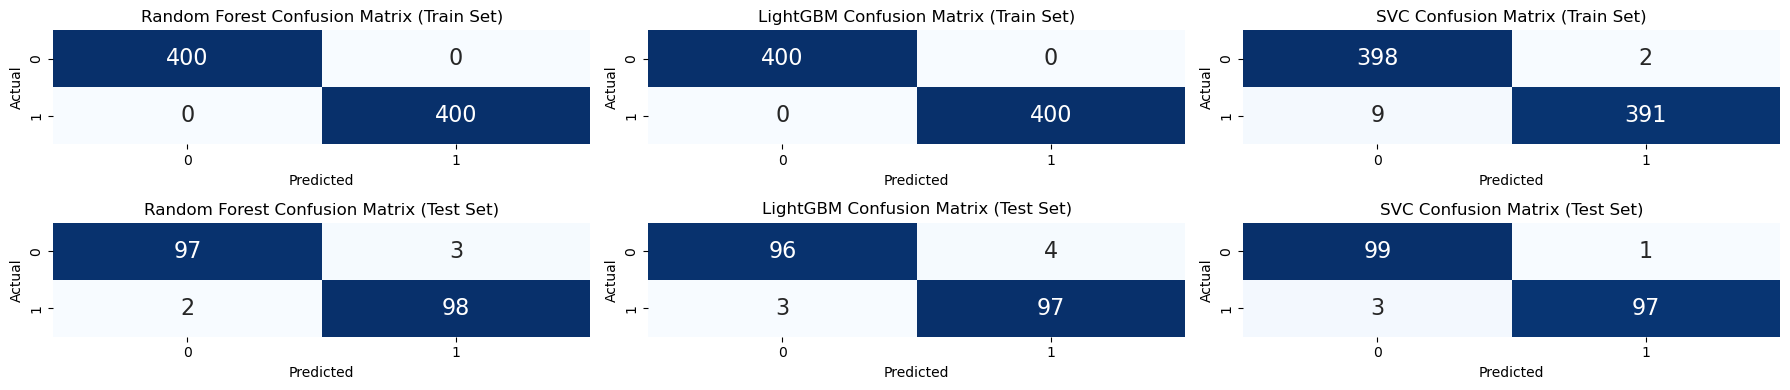


Random Forest F1 Score (Training Set): 1.0
Random Forest F1 Score (Test Set): 0.9749993749843745


LightGBM F1 Score (Training Set): 1.0
LightGBM F1 Score (Test Set): 0.9649991249781243


SVC F1 Score (Training Set): 0.9862489471850188
SVC F1 Score (Test Set): 0.97999799979998



In [54]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_normalized, y_train)
rf_predictions_train = rf_model.predict(X_train_normalized)
rf_predictions_test = rf_model.predict(X_test_normalized)

# LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train_normalized, y_train)
lgbm_predictions_train = lgbm_model.predict(X_train_normalized)
lgbm_predictions_test = lgbm_model.predict(X_test_normalized)

# Support Vector Classifier (SVC)
svc_model = SVC(random_state=42)
svc_model.fit(X_train_normalized, y_train)
svc_predictions_train = svc_model.predict(X_train_normalized)
svc_predictions_test = svc_model.predict(X_test_normalized)

# Models
models = {
    "Random Forest": {"train": rf_predictions_train, "test": rf_predictions_test},
    "LightGBM": {"train": lgbm_predictions_train, "test": lgbm_predictions_test},
    "SVC": {"train": svc_predictions_train, "test": svc_predictions_test},
}

for model_name, predictions_dict in models.items():
    print(f"\n{model_name} Training Set:")
    print(confusion_matrix(y_train, predictions_dict["train"]))
    print(classification_report(y_train, predictions_dict["train"]))

    print(f"\n{model_name} Testing Set:")
    print(confusion_matrix(y_test, predictions_dict["test"]))
    print(classification_report(y_test, predictions_dict["test"]))

    print("\n" + "=" * 40)

# Plot Confusion Matrix for each model (Train and Test)
plt.figure(figsize=(18, 4))
for i, (model_name, predictions_dict) in enumerate(models.items()):
    plt.subplot(2, len(models), i + 1)
    cm_train = confusion_matrix(y_train, predictions_dict["train"])
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'{model_name} Confusion Matrix (Train Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.subplot(2, len(models), len(models) + i + 1)
    cm_test = confusion_matrix(y_test, predictions_dict["test"])
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title(f'{model_name} Confusion Matrix (Test Set)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# F1 Score for all models
for model_name, predictions_dict in models.items():
    f1_train = f1_score(y_train, predictions_dict["train"], average='weighted')
    f1_test = f1_score(y_test, predictions_dict["test"], average='weighted')
    print(f'\n{model_name} F1 Score (Training Set): {f1_train}')
    print(f'{model_name} F1 Score (Test Set): {f1_test}\n')




Comparing the F1 scores on the test set, the SVC model performed slightly better with an F1 score of 0.980, followed by the Random Forest model with an F1 score of 0.975, and the LightGBM model with an F1 score of 0.965.

In [53]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances
result = permutation_importance(svc_model, X_train_normalized, y_train, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Get feature names
feature_names = X_train_normalized.columns

# Sort feature importances and feature names
indices = importances.argsort()[::-1]

# Print feature importances
print("Feature Importances:")
for f in range(len(indices)):
    print(f"{feature_names[indices[f]]}: {importances[indices[f]]}")


Feature Importances:
Daily Time Spent on Site: 0.17637499999999995
Daily Internet Usage: 0.16512499999999997
Area Income: 0.05074999999999996
Age: 0.03349999999999995
Category_Otomotif: 0.003624999999999945
Category_Food: 0.003624999999999934
Timestamp_Month_January: 0.0034999999999999476
Timestamp_Month_March: 0.0027499999999999526
Timestamp_Month_May: 0.0027499999999999413
Sex_Perempuan: 0.002499999999999958
Category_Finance: 0.002249999999999952
Category_House: 0.0013749999999999706
Timestamp_Month_July: 0.0013749999999999706
Timestamp_Month_February: 0.0012499999999999734
Category_Electronic: 0.0006249999999999867
Category_Travel: 0.0004999999999999782
Timestamp_Month_June: 0.000374999999999992
Category_Health: 0.0002499999999999947
Category_Fashion: 0.0002499999999999947
Category_Furniture: 0.0
Timestamp_Year: 0.0


The features that contribute the most are
- Daily Time Spent on Site
- Daily Internet Usage
- Area Income
- Age

Timestamp_Year (0.0): has zero importance, it doesn't contribute to the model's predictive performance.